In [1]:
from Funcs.Utility import *

In [2]:
LABELS_PROC = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'labels_1h_esmsyn.csv'), index_col=['pcode','timestamp'],parse_dates=True)
PARTICIPANTS = pd.read_csv(os.path.join(PATH_INTERMEDIATE, 'UserInfo.csv'),index_col = 'pcode')

In [3]:
p = os.path.join(PATH_INTERMEDIATE, 'stress_binary_personal-15min.pkl')
X, y, groups, t, datetimes = load(p)

In [4]:
X

,PIF#participationStartTimestamp,PIF#age,PIF#openness,PIF#conscientiousness,PIF#neuroticism,PIF#extraversion,PIF#agreeableness,PIF#GHQ12,PIF#PSS10,PIF#CESD-R,...,PWR#RLV_SUP_TodayAfternoon,PWR#ETP#_TodayLateAfternoon,PWR#ASC#_TodayLateAfternoon,PWR#RLV_SUP_TodayLateAfternoon,PWR#ETP#_TodayEvening,PWR#ASC#_TodayEvening,PWR#RLV_SUP_TodayEvening,PWR#ETP#_TodayNight,PWR#ASC#_TodayNight,PWR#RLV_SUP_TodayNight
0,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.637712e+12,23.0,11.0,12.0,3.0,10.0,9.0,9.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21614,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21615,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21616,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21617,1.638922e+12,20.0,10.0,8.0,4.0,7.0,14.0,7.0,12.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
#Divide the features into different categories
feat_current = X.loc[:,[('#VAL' in str(x)) or ('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_dsc = X.loc[:,[('#DSC' in str(x))  for x in X.keys()]]  
feat_yesterday = X.loc[:,[('Yesterday' in str(x))  for x in X.keys()]]  
feat_today = X.loc[:,[('Today' in str(x))  for x in X.keys()]]  
feat_sleep = X.loc[:,[('Sleep' in str(x))  for x in X.keys()]]  
feat_time = X.loc[:,[('Time' in str(x))  for x in X.keys()]]  
feat_pif = X.loc[:,[('PIF' in str(x))  for x in X.keys()]]  
feat_ImmediatePast = X.loc[:,[('ImmediatePast_15' in str(x))  for x in X.keys()]]
#Divide the time window features into sensor/past stress label
feat_current_sensor = X.loc[:,[('#VAL' in str(x))  for x in X.keys()]]  
feat_current_ESM = X.loc[:,[('ESM#LastLabel' in str(x)) for x in X.keys()]]  
feat_ImmediatePast_sensor = feat_ImmediatePast.loc[:,[('ESM' not in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_ImmediatePast_ESM = feat_ImmediatePast.loc[:,[('ESM'  in str(x)) for x in feat_ImmediatePast.keys()]]  
feat_today_sensor = feat_today.loc[:,[('ESM' not in str(x))  for x in feat_today.keys()]]  
feat_today_ESM = feat_today.loc[:,[('ESM'  in str(x)) for x in feat_today.keys()]]  
feat_yesterday_sensor = feat_yesterday.loc[:,[('ESM' not in str(x)) for x in feat_yesterday.keys()]]  
feat_yesterday_ESM = feat_yesterday.loc[:,[('ESM'  in str(x)) for x in feat_yesterday.keys()]]

In [6]:
feat_baseline = pd.concat([ feat_time,feat_dsc,feat_current_sensor, feat_ImmediatePast_sensor],axis=1)
feat_final = pd.concat([feat_baseline  ], axis=1)
# # Fill NaN values with zeros
feat_final = feat_final.fillna(0)
X = feat_final
cats = X.columns[X.dtypes == bool]

In [7]:
cn = X.columns.tolist()
print(cn)

['PIF#participationStartTimestamp', 'Time#DOW=MON', 'Time#DOW=TUE', 'Time#DOW=WED', 'Time#DOW=THU', 'Time#DOW=FRI', 'Time#DOW=SAT', 'Time#DOW=SUN', 'Time#WKD=Y', 'Time#WKD=N', 'Time#HRN=DAWN', 'Time#HRN=MORNING', 'Time#HRN=AFTERNOON', 'Time#HRN=LATE_AFTERNOON', 'Time#HRN=EVENING', 'Time#HRN=NIGHT', 'Time#HRN=MIDNIGHT', 'APP_CAT#DSC', 'APP_CAT#DSC=UNKNOWNSYSTEMENTERSOCIALHEALTHWORKINFO', 'BAT_STA#DSC', 'BAT_STA#DSC=DISCHARGINGCHARGINGFULLNOT_CHARGING', 'BAT_PLG#DSC', 'BAT_PLG#DSC=UNDEFINEDACUSBWIRELESS', 'CALL_CNT#DSC', 'CALL_CNT#DSC=UNKNOWNMOBILEOTHERWORKHOMEUNDEFINEDMAIN', 'LOC_LABEL#DSC', 'LOC_LABEL#DSC=noneworkhome', 'SCR_EVENT#DSC', 'SCR_EVENT#DSC=SCREEN_OFFSCREEN_ONUSER_PRESENT', 'RING#DSC', 'RING#DSC=VIBRATESILENTNORMAL', 'CHG#DSC', 'CHG#DSC=DISCONNECTED', 'CHG#DSC=CONNECTED', 'BT_BondState#DSC', 'BT_BondState#DSC=NONEBONDEDBONDING', 'BT_DeviceType#DSC', 'BT_DeviceType#DSC=LECLASSICUNDEFINEDDUAL', 'BT_classType#DSC', 'BT_classType#DSC=UNDEFINEDPHONE_SMARTWEARABLE_WRIST_WATCHCOMPU

In [8]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone

normalize =True
# Feature selection method
selector = SelectFromModel(
        estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=seed, max_iter=4000),
        threshold=0.005
#         estimator=LinearSVC(
#         penalty='l1',
#         loss='squared_hinge',
#         dual=False,
#         tol=1e-3,
#         C=1e-2,
#         max_iter=5000,
#         random_state=RANDOM_STATE
#     )  
    )
select = [clone(selector)]
oversample = True

In [9]:
import os
import pandas as pd
import numpy as np
import ray
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTENC, SMOTE
from tqdm import tqdm
from sklearn.model_selection import StratifiedGroupKFold, GroupKFold, KFold, TimeSeriesSplit, LeavePGroupsOut, train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder



def get_cv_splits(cv_strategy, data, labels, groups=None):
    """
    Returns the train-test splits based on the chosen cross-validation strategy.
    """
    if cv_strategy == 'loso':
        cv = LeaveOneGroupOut()
        return cv.split(data, labels, groups)
    elif cv_strategy == 'group_k_fold':
        cv = GroupKFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data, labels, groups)
    elif cv_strategy == 'k_fold':
        cv = KFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    elif cv_strategy == 'time_series':
        cv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    else:
        raise ValueError(f"Unknown CV strategy: {cv_strategy}")


def get_categorical_features_indices(df):
    return [i for i, col in enumerate(df.columns) if df[col].nunique() <= 10]

def exclude_low_variance(agg_feature, threshold=.0000001):
    agg_feature_non_zero_var = agg_feature.loc[:,agg_feature.var()>threshold]
    num_removed = agg_feature.shape[1]-agg_feature_non_zero_var.shape[1]
    print(f'{num_removed}/{agg_feature.shape[1]} features with variance < {threshold} removed')
    return agg_feature_non_zero_var

def remove_pairwise_corr(agg_feature_percent_missing, PAIRWISE_CORR_THRESHOLD=0.8, outcome_variable=None):
    if outcome_variable is not None:
        outcome_variable = pd.Series(outcome_variable, index=agg_feature_percent_missing.index, name="outcome")
        corr_with_outcome = pd.merge(outcome_variable, agg_feature_percent_missing, left_index=True, right_index=True).corr()[outcome_variable.name].abs().sort_values(ascending=False)
        importance_order = corr_with_outcome.index[1:].tolist()
        agg_feature_percent_missing = agg_feature_percent_missing[importance_order]

    Matrix = agg_feature_percent_missing.corr().abs()
    
    upper_triangle = Matrix.where(np.triu(np.ones(Matrix.shape), k=1).astype(bool))

    correlated_features = set()
    for feature in upper_triangle.columns:
        highly_correlated = upper_triangle[feature][upper_triangle[feature] > PAIRWISE_CORR_THRESHOLD].index
        correlated_features.update(highly_correlated)

    kept_features = list(set(agg_feature_percent_missing.columns) - correlated_features)
    print(f"Pairwise Corr: kept only {len(kept_features)}/{len(agg_feature_percent_missing.columns)} features")
    return agg_feature_percent_missing[kept_features]



# Feature selection method
def feature_selector(X_train, y_train):
    selector = SelectFromModel(
        estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=seed, max_iter=4000),
        threshold=0.005
#         estimator=LinearSVC(
#         penalty='l1',
#         loss='squared_hinge',
#         dual=False,
#         tol=1e-3,
#         C=1e-2,
#         max_iter=5000,
#         random_state=RANDOM_STATE
#     )
    
    )
    selector.fit(X_train, y_train)
    return selector

def split_train_test(df, labels, train_idx, test_idx):
    X_train = df.iloc[train_idx]
    y_train = labels[train_idx]
    X_test = df.iloc[test_idx]
    y_test = labels[test_idx]
    return X_train, y_train, X_test, y_test

def process_dataframe(X):
    """
    Process the input DataFrame 'X':
    1. Set column names as a range from 0 to the number of columns.
    2. Replace boolean values with 1 for True and 0 for False.

    Parameters:
        X (pandas.DataFrame): The input DataFrame.

    Returns:
        pandas.DataFrame: The processed DataFrame.
    """
    # Set column names as a range from 0 to the number of columns
    X.columns = range(X.shape[1])

    # Replace boolean values with 1 for True and 0 for False
#     X = X * 1

    return X

def save_data_to_data_file(X, y, filename):
    if not os.path.exists(PATH_SAVE):
        os.makedirs(PATH_SAVE)

    file_path = os.path.join(PATH_SAVE, filename)

    with open(file_path, 'w') as f:
        for i in range(len(X)):
            # Check if y is a numpy array or dataframe
            label = y[i] if isinstance(y, np.ndarray) else y.iloc[i].values[0]
            
            # Start building the line with the label
            line = str(label)
            
            # Iterate through columns of X
            for col_idx, value in enumerate(X[i] if isinstance(X, np.ndarray) else X.iloc[i]):
                line += " {}:{}".format(col_idx, value)
            
            f.write(line + '\n')

In [10]:
import os
import pandas as pd
import numpy as np
import ray
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from imblearn.over_sampling import SMOTENC, SMOTE
from tqdm import tqdm
from sklearn.model_selection import StratifiedGroupKFold, GroupKFold, KFold, TimeSeriesSplit, LeavePGroupsOut, train_test_split, GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder



def get_cv_splits(cv_strategy, data, labels, groups=None):
    """
    Returns the train-test splits based on the chosen cross-validation strategy.
    """
    if cv_strategy == 'loso':
        cv = LeaveOneGroupOut()
        return cv.split(data, labels, groups)
    elif cv_strategy == 'group_k_fold':
        cv = GroupKFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data, labels, groups)
    elif cv_strategy == 'k_fold':
        cv = KFold(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    elif cv_strategy == 'time_series':
        cv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits
        return cv.split(data)
    else:
        raise ValueError(f"Unknown CV strategy: {cv_strategy}")


def get_categorical_features_indices(df):
    return [i for i, col in enumerate(df.columns) if df[col].nunique() <= 10]

def exclude_low_variance(agg_feature, threshold=.0000001):
    agg_feature_non_zero_var = agg_feature.loc[:,agg_feature.var()>threshold]
    num_removed = agg_feature.shape[1]-agg_feature_non_zero_var.shape[1]
    print(f'{num_removed}/{agg_feature.shape[1]} features with variance < {threshold} removed')
    return agg_feature_non_zero_var

def remove_pairwise_corr(agg_feature_percent_missing, PAIRWISE_CORR_THRESHOLD=0.8, outcome_variable=None):
    if outcome_variable is not None:
        outcome_variable = pd.Series(outcome_variable, index=agg_feature_percent_missing.index, name="outcome")
        corr_with_outcome = pd.merge(outcome_variable, agg_feature_percent_missing, left_index=True, right_index=True).corr()[outcome_variable.name].abs().sort_values(ascending=False)
        importance_order = corr_with_outcome.index[1:].tolist()
        agg_feature_percent_missing = agg_feature_percent_missing[importance_order]

    Matrix = agg_feature_percent_missing.corr().abs()
    
    upper_triangle = Matrix.where(np.triu(np.ones(Matrix.shape), k=1).astype(bool))

    correlated_features = set()
    for feature in upper_triangle.columns:
        highly_correlated = upper_triangle[feature][upper_triangle[feature] > PAIRWISE_CORR_THRESHOLD].index
        correlated_features.update(highly_correlated)

    kept_features = list(set(agg_feature_percent_missing.columns) - correlated_features)
    print(f"Pairwise Corr: kept only {len(kept_features)}/{len(agg_feature_percent_missing.columns)} features")
    return agg_feature_percent_missing[kept_features]



# Feature selection method
def feature_selector(X_train, y_train):
    selector = SelectFromModel(
        estimator=LogisticRegression(penalty='l1', solver='liblinear', C=1, random_state=seed, max_iter=4000),
        threshold=0.005
#         estimator=LinearSVC(
#         penalty='l1',
#         loss='squared_hinge',
#         dual=False,
#         tol=1e-3,
#         C=1e-2,
#         max_iter=5000,
#         random_state=RANDOM_STATE
#     )
    
    )
    selector.fit(X_train, y_train)
    return selector

def split_train_test(df, labels, train_idx, test_idx):
    X_train = df.iloc[train_idx]
    y_train = labels[train_idx]
    X_test = df.iloc[test_idx]
    y_test = labels[test_idx]
    return X_train, y_train, X_test, y_test



# @ray.remote
# # def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file, C_cat, C_num, select):
# def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file):
#     X_train, y_train, X_test, y_test = split_train_test(all_data, all_labels, train_idx, test_idx)
    
# #     # Use LOSO to split the training set further into training and evaluation sets
# #     loso = LeaveOneGroupOut()
# #     train_indices, eval_indices = next(loso.split(X_train, y_train, groups=all_groups[train_idx]))    
# #     X_eval, y_eval = X_train.iloc[eval_indices], y_train[eval_indices]
# #     X_train, y_train = X_train.iloc[train_indices], y_train[train_indices]
    
#     # Split 20% of training set as eval set
#     X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE)

# #     # Split 20% of training set as eval set based on groups
# #     gss = GroupShuffleSplit(test_size=0.2, random_state=RANDOM_STATE)
# #     train_inds, eval_inds = next(gss.split(X_train, y_train, groups=all_groups[train_idx]))
# #     X_eval, y_eval = X_train.iloc[eval_inds], y_train[eval_inds]
# #     X_train, y_train = X_train.iloc[train_inds], y_train[train_inds]
    
#     # Apply SMOTENC
#     smote_nc = SMOTENC(categorical_features=get_categorical_features_indices(X_train), random_state=RANDOM_STATE)
#     X_train, y_train = smote_nc.fit_resample(X_train, y_train)
    
# #     #Removing low variance features
# #     X_train = exclude_low_variance(X_train)
# #     X_test = X_test[X_train.columns]  # Keep only the selected features in the test set

# #     #Removing highly correlated features
# #     X_train = remove_pairwise_corr(X_train, outcome_variable= y_train)
# #     X_test = X_test[X_train.columns]  # Keep only the selected features in the test set
    
#     # Capture indices 
#     train_indices = X_train.index
#     eval_indices = X_eval.index
#     test_indices = X_test.index
    
#     # Before feature selection, capture the columns
#     current_columns = X_train.columns
    
#     # Feature selection
#     selector = feature_selector(X_train, y_train)
#     X_train = selector.transform(X_train)
#     X_eval = selector.transform(X_eval)
#     X_test = selector.transform(X_test)

#     # Use the captured columns to get the selected columns
#     selected_columns = current_columns[selector.get_support()]
    
#     X_train = pd.DataFrame(X_train, columns=selected_columns, index=train_indices)
#     X_eval = pd.DataFrame(X_eval, columns=selected_columns, index=eval_indices)
#     X_test = pd.DataFrame(X_test, columns=selected_columns, index=test_indices)

    
#     # Process dataframes
#     X_train = process_dataframe(X_train)
#     X_eval = process_dataframe(X_eval)
#     X_test = process_dataframe(X_test)

#     subject = all_groups[test_idx[0]]

#     save_data_to_data_file(X_train, y_train, f'{subject}_train.data')
#     save_data_to_data_file(X_eval, y_eval, f'{subject}_eval.data')
#     save_data_to_data_file(X_test, y_test, f'{subject}_val.data')

@ray.remote
def process_and_save_split(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file, C_cat, C_num, select):
    X_train, y_train, X_test, y_test = split_train_test(all_data, all_labels, train_idx, test_idx)
    

#     #Leave n subject out
#     n = 4  # Number of groups to leave out
#     # Use LNGO to split the training set further into training and evaluation sets
#     lngo = LeavePGroupsOut(n_groups=n)
#     train_indices, eval_indices = next(lngo.split(X_train, y_train, groups=all_groups[train_idx]))    
#     X_eval, y_eval = X_train.iloc[eval_indices].copy(), y_train[eval_indices].copy()
#     X_train, y_train = X_train.iloc[train_indices].copy(), y_train[train_indices].copy()

    
#     # Use LOSO to split the training set further into training and evaluation sets
#     loso = LeaveOneGroupOut()
#     train_indices, eval_indices = next(loso.split(X_train, y_train, groups=all_groups[train_idx]))    
#     X_eval, y_eval = X_train.iloc[eval_indices].copy(), y_train[eval_indices].copy()
#     X_train, y_train = X_train.iloc[train_indices].copy(), y_train[train_indices].copy()


#     # Initialize the stratified group k-fold splitter
#     sgkf = StratifiedGroupKFold(n_splits=5, random_state=RANDOM_STATE, shuffle=True)
#     # Get the train and eval indices
#     train_inds, eval_inds = next(sgkf.split(X_train, y_train, groups=all_groups[train_idx]))
#     X_eval, y_eval = X_train.iloc[eval_inds], y_train[eval_inds]
#     X_train, y_train = X_train.iloc[train_inds], y_train[train_inds]

    
    # Split 20% of training set as eval set
    X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=RANDOM_STATE,  stratify=y_train)

#     # Split 20% of training set as eval set based on groups
#     gss = GroupShuffleSplit(test_size=0.2, random_state=RANDOM_STATE)
#     train_inds, eval_inds = next(gss.split(X_train, y_train, groups=all_groups[train_idx]))
#     X_eval, y_eval = X_train.iloc[eval_inds], y_train[eval_inds]
#     X_train, y_train = X_train.iloc[train_inds], y_train[train_inds]

    if normalize:
        # Normalize numeric features
        scaler = StandardScaler().fit(X_train[C_num])
        X_train[C_num] = scaler.transform(X_train[C_num].copy())
        X_eval[C_num] = scaler.transform(X_eval[C_num].copy())
        X_test[C_num] = scaler.transform(X_test[C_num].copy())

    if select:
        if isinstance(select, SelectFromModel):
            select = [select]
            
        for i, s in enumerate(select):
            # Fit feature selector only on training data
            s.fit(X_train, y_train)
            selected_features = X_train.columns[s.get_support()]
            
            # Apply feature selection to train, eval, and test
            X_train = X_train[selected_features].copy()
            X_eval = X_eval[selected_features].copy()
            X_test = X_test[selected_features].copy()

    if oversample:
        # Determine categorical features for SMOTENC
        if len(C_cat):
            M = np.isin(X_train.columns, C_cat)
            sampler = SMOTENC(categorical_features=M, random_state=seed)
        else:
            sampler = SMOTE(random_state=seed)
        # Only oversample training data
        X_train, y_train = sampler.fit_resample(X_train, y_train)
    
    # Apply consistent processing to train, eval, and test dataframes
    X_train = process_dataframe(X_train)
    X_eval = process_dataframe(X_eval)
    X_test = process_dataframe(X_test)

    subject = all_groups[test_idx[0]]

    # Save processed data to files
    save_data_to_data_file(X_train, y_train, f'{subject}_train.data')
    save_data_to_data_file(X_eval, y_eval, f'{subject}_eval.data')
    save_data_to_data_file(X_test, y_test, f'{subject}_val.data')


In [11]:
# Create a full dataset and corresponding labels and groups
all_data = X
all_labels = y
all_groups = groups

In [12]:
cv_strategy = 'loso'  # Choose from: 'loso', 'group_k_fold', 'k_fold', 'time_series'

with on_ray():
    # Get the relevant train-test splits based on the chosen CV strategy
    splits = get_cv_splits(cv_strategy, all_data, all_labels, all_groups)
    
    C_cat = np.asarray(sorted(cats))
    C_num = np.asarray(sorted(X.columns[~X.columns.isin(C_cat)]))
#    Iterate over train-test splits
    futures = [process_and_save_split.remote(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file, C_cat, C_num, select) 
#    futures = [process_and_save_split.remote(train_idx, test_idx, all_data, all_labels, all_groups, process_dataframe, save_data_to_data_file)
                                         for train_idx, test_idx in splits]

    ray.get(futures)

2024-08-13 13:33:41,147	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 
(process_and_save_split pid=84927) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=84927) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=84927) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=84927) 
(process_and_save_split pid=84927) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(process_and_save_split pid=84919) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning:  [repeated 16x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/ray-logging.html#log-deduplication for more options.)
(process_and_save_split pid=84919) A value is trying to be 

(process_and_save_split pid=84930) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning:  [repeated 3x across cluster]
(process_and_save_split pid=84930) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 3x across cluster]
(process_and_save_split pid=84930) Try using .loc[row_indexer,col_indexer] = value instead [repeated 3x across cluster]
(process_and_save_split pid=84930)  [repeated 3x across cluster]
(process_and_save_split pid=84930) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [repeated 3x across cluster]
(process_and_save_split pid=84932) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning:  [repeated 2x across cluster]
(process_and_save_split pid=84932) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 2x across cluster]
(process_and_save_split pid=84932) Try using .loc[row_indexer,col_indexer] = value instead [re

(process_and_save_split pid=84933) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning:  [repeated 3x across cluster]
(process_and_save_split pid=84933) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 3x across cluster]
(process_and_save_split pid=84933) Try using .loc[row_indexer,col_indexer] = value instead [repeated 3x across cluster]
(process_and_save_split pid=84933)  [repeated 3x across cluster]
(process_and_save_split pid=84933) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [repeated 3x across cluster]
(process_and_save_split pid=84924) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning:  [repeated 2x across cluster]
(process_and_save_split pid=84924) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 2x across cluster]
(process_and_save_split pid=84924) Try using .loc[row_indexer,col_indexer] = value instead [re

(process_and_save_split pid=84932) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning:  [repeated 2x across cluster]
(process_and_save_split pid=84932) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 2x across cluster]
(process_and_save_split pid=84932) Try using .loc[row_indexer,col_indexer] = value instead [repeated 2x across cluster]
(process_and_save_split pid=84932)  [repeated 2x across cluster]
(process_and_save_split pid=84932) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [repeated 2x across cluster]
(process_and_save_split pid=84930) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning:  [repeated 2x across cluster]
(process_and_save_split pid=84930) A value is trying to be set on a copy of a slice from a DataFrame. [repeated 2x across cluster]
(process_and_save_split pid=84930) Try using .loc[row_indexer,col_indexer] = value instead [re

(process_and_save_split pid=84930) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=84930) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=84930) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=84930) 
(process_and_save_split pid=84930) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
(process_and_save_split pid=84928) /tmp/ipykernel_84685/632661198.py:203: SettingWithCopyWarning: 
(process_and_save_split pid=84928) A value is trying to be set on a copy of a slice from a DataFrame.
(process_and_save_split pid=84928) Try using .loc[row_indexer,col_indexer] = value instead
(process_and_save_split pid=84928) 
(process_and_save_split pid=84928) See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Training

In [13]:
param = {
    "learning_rate": 0.01,
    "seed": RANDOM_STATE,
    "objective": 'binary:logistic',
    'eval_metric': 'auc',
    'verbosity': 0,
}

In [14]:
import xgboost as xgb
import random
from sklearn.metrics import (roc_auc_score, precision_recall_fscore_support,
                             log_loss, accuracy_score, f1_score, precision_score,
                             recall_score, roc_curve, auc)
import numpy as np
import os
import pickle
import ray
import pandas as pd
from sklearn.datasets import load_svmlight_file
from xgboost import DMatrix


def mkdir(path):
    path = path.strip()
    isExists = os.path.exists(path)
    if not isExists:
        os.makedirs(path)
        return True
    else:
        return False

def find_best_threshold(y_true, y_probs):
    best_threshold = 0
    best_f1 = 0
    thresholds = np.arange(0, 1.01, 0.01)
    for threshold in thresholds:
        y_pred = (y_probs > threshold).astype(int)
        current_f1 = f1_score(y_true, y_pred)
        if current_f1 > best_f1:
            best_f1 = current_f1
            best_threshold = threshold
    return best_threshold

random.seed(seed)

folder = PATH_RESULTS
mkdir(folder)
data_folder = PATH_SAVE

final_total_auc = np.empty(0)
final_total_logloss = np.empty(0)
final_total_f1_macro = np.empty(0)
final_total_f1_pos_label = np.empty(0)
final_total_accuracy = np.empty(0)
final_total_precision = np.empty(0)
final_total_recall = np.empty(0)
train_aucs = []
test_aucs = []



# @ray.remote
def train_and_evaluate(subject, param, data_folder):

    print("start training & evaluation for {}".format(subject))


    # Convert data to DMatrix format for XGBoost
    dtrain = xgb.DMatrix(data_folder + '{}_train.data'.format(subject))
    dtest = xgb.DMatrix(data_folder + '{}_val.data'.format(subject))
    deval = xgb.DMatrix(data_folder + '{}_eval.data'.format(subject))
    

    evallist = [(dtrain, 'train'), (deval, 'eval')]

    # Train the model using standard xgboost
    bst = xgb.train(param, dtrain, evals=evallist, early_stopping_rounds=10)
    
    y_real = dtest.get_label()  # Use the labels directly
    y_score = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
#     y_score = bst.predict(dtest)
#     best_threshold = find_best_threshold(y_real, y_score)
#     y_pred = [1 if score >= best_threshold else 0 for score in y_score]
    y_pred = [1 if score >= 0.5 else 0 for score in y_score]

    all_roc_auc = roc_auc_score(y_true=y_real, y_score=y_score, average=None)
    all_logloss = log_loss(y_real, y_score)
    accuracy = accuracy_score(y_real, y_pred)

    pre, rec, f1, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='macro', zero_division=0)
    precision = pre
    recall = rec
    f1_macro = f1

    _, _, f1_pos, _ = precision_recall_fscore_support(y_true=y_real, y_pred=y_pred, pos_label=1, average='binary', zero_division=0)
    f1_pos_label = f1_pos
    print("finish training & evaluation for {}".format(subject))

#     return subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label

    ###############################
    # Compute training AUC
    y_train_real = dtrain.get_label()
    y_train_score = bst.predict(dtrain, ntree_limit=bst.best_ntree_limit)
    train_auc = roc_auc_score(y_true=y_train_real, y_score=y_train_score)
    
    test_auc = all_roc_auc

    return subject, train_auc, test_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label
 
with on_ray():
    results = [train_and_evaluate(subject, param, data_folder) for subject in set(all_groups)]
#     futures = [train_and_evaluate.remote(subject, param, data_folder) for subject in combined_similarity['pcode'].unique()]
#     results = ray.get(futures)

    for result in results:
         #Retrieving training AUC
        subject, train_auc, test_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label = result
        train_aucs.append(train_auc)
        test_aucs.append(test_auc)
        
#         subject, all_roc_auc, all_logloss, accuracy, precision, recall, f1_macro, f1_pos_label = result
        # Append to final metric arrays
#         final_total_auc = np.append(final_total_auc, all_roc_auc)

        final_total_logloss = np.append(final_total_logloss, all_logloss)
        final_total_accuracy = np.append(final_total_accuracy, accuracy)
        final_total_precision = np.append(final_total_precision, precision)
        final_total_recall = np.append(final_total_recall, recall)
        final_total_f1_macro = np.append(final_total_f1_macro, f1_macro)
        final_total_f1_pos_label = np.append(final_total_f1_pos_label, f1_pos_label)

    print("TOTAL All round, ROCAUC{}, LOGLOSS{}, ACCURACY{}, PRECISION{}, RECALL{}, F1 MACRO{}, F1 POSITIVE LABEL{},\n".format(np.mean(test_aucs), np.mean(final_total_logloss), np.mean(final_total_accuracy), np.mean(final_total_precision), np.mean(final_total_recall), np.mean(final_total_f1_macro), np.mean(final_total_f1_pos_label)))

2024-08-13 13:46:09,172	INFO worker.py:1612 -- Started a local Ray instance. View the dashboard at 127.0.0.1:8265 


start training & evaluation for P117
[0]	train-auc:0.61900	eval-auc:0.54957
[1]	train-auc:0.63723	eval-auc:0.55850
[2]	train-auc:0.64178	eval-auc:0.55847
[3]	train-auc:0.64441	eval-auc:0.56012
[4]	train-auc:0.64414	eval-auc:0.56004
[5]	train-auc:0.64715	eval-auc:0.56324
[6]	train-auc:0.64739	eval-auc:0.56361
[7]	train-auc:0.65413	eval-auc:0.56897
[8]	train-auc:0.65375	eval-auc:0.56930
[9]	train-auc:0.66755	eval-auc:0.57455
finish training & evaluation for P117
start training & evaluation for P073


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63009	eval-auc:0.54189
[1]	train-auc:0.63521	eval-auc:0.54291
[2]	train-auc:0.63716	eval-auc:0.54469
[3]	train-auc:0.65828	eval-auc:0.55159
[4]	train-auc:0.65983	eval-auc:0.55265
[5]	train-auc:0.66686	eval-auc:0.55545
[6]	train-auc:0.67065	eval-auc:0.55619
[7]	train-auc:0.67040	eval-auc:0.55705
[8]	train-auc:0.67587	eval-auc:0.55796
[9]	train-auc:0.67428	eval-auc:0.55730
finish training & evaluation for P073
start training & evaluation for P107


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63784	eval-auc:0.55290
[1]	train-auc:0.63908	eval-auc:0.55190
[2]	train-auc:0.66771	eval-auc:0.56520
[3]	train-auc:0.66387	eval-auc:0.56200
[4]	train-auc:0.67020	eval-auc:0.56673
[5]	train-auc:0.67028	eval-auc:0.56357
[6]	train-auc:0.67469	eval-auc:0.56296
[7]	train-auc:0.67496	eval-auc:0.56207
[8]	train-auc:0.68500	eval-auc:0.56592
[9]	train-auc:0.69251	eval-auc:0.56665
finish training & evaluation for P107
start training & evaluation for P125


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63065	eval-auc:0.55715
[1]	train-auc:0.63248	eval-auc:0.56420
[2]	train-auc:0.64616	eval-auc:0.56683
[3]	train-auc:0.64521	eval-auc:0.56799
[4]	train-auc:0.64952	eval-auc:0.57116
[5]	train-auc:0.65238	eval-auc:0.57102
[6]	train-auc:0.65373	eval-auc:0.57307
[7]	train-auc:0.65476	eval-auc:0.57225
[8]	train-auc:0.65661	eval-auc:0.57323
[9]	train-auc:0.66345	eval-auc:0.57597
finish training & evaluation for P125
start training & evaluation for P097


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63779	eval-auc:0.55797
[1]	train-auc:0.67824	eval-auc:0.57230
[2]	train-auc:0.67654	eval-auc:0.57159
[3]	train-auc:0.68120	eval-auc:0.57470
[4]	train-auc:0.68164	eval-auc:0.57221
[5]	train-auc:0.68280	eval-auc:0.57376
[6]	train-auc:0.68669	eval-auc:0.57381
[7]	train-auc:0.69363	eval-auc:0.57518
[8]	train-auc:0.69266	eval-auc:0.57485
[9]	train-auc:0.69536	eval-auc:0.57476
finish training & evaluation for P097
start training & evaluation for P041


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64595	eval-auc:0.55285
[1]	train-auc:0.64912	eval-auc:0.55995
[2]	train-auc:0.64968	eval-auc:0.55951
[3]	train-auc:0.65047	eval-auc:0.56012
[4]	train-auc:0.65072	eval-auc:0.55910
[5]	train-auc:0.65179	eval-auc:0.56002
[6]	train-auc:0.65360	eval-auc:0.56160
[7]	train-auc:0.66129	eval-auc:0.56388
[8]	train-auc:0.66353	eval-auc:0.56347
[9]	train-auc:0.66615	eval-auc:0.56434
finish training & evaluation for P041
start training & evaluation for P034


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63953	eval-auc:0.57112
[1]	train-auc:0.64271	eval-auc:0.56971
[2]	train-auc:0.64370	eval-auc:0.56987
[3]	train-auc:0.64651	eval-auc:0.57074
[4]	train-auc:0.64611	eval-auc:0.57252
[5]	train-auc:0.66200	eval-auc:0.57468
[6]	train-auc:0.66581	eval-auc:0.57733
[7]	train-auc:0.66472	eval-auc:0.57661
[8]	train-auc:0.66604	eval-auc:0.57853
[9]	train-auc:0.66595	eval-auc:0.57864
finish training & evaluation for P034
start training & evaluation for P135


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63464	eval-auc:0.55084
[1]	train-auc:0.63786	eval-auc:0.55197
[2]	train-auc:0.63860	eval-auc:0.55230
[3]	train-auc:0.64256	eval-auc:0.54932
[4]	train-auc:0.64330	eval-auc:0.55003
[5]	train-auc:0.64502	eval-auc:0.54867
[6]	train-auc:0.64601	eval-auc:0.54865
[7]	train-auc:0.64660	eval-auc:0.54851
[8]	train-auc:0.65569	eval-auc:0.55256
[9]	train-auc:0.65648	eval-auc:0.55419
finish training & evaluation for P135
start training & evaluation for P050


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63240	eval-auc:0.56118
[1]	train-auc:0.63369	eval-auc:0.56021
[2]	train-auc:0.63475	eval-auc:0.56092
[3]	train-auc:0.64011	eval-auc:0.56265
[4]	train-auc:0.64435	eval-auc:0.56390
[5]	train-auc:0.64511	eval-auc:0.56311
[6]	train-auc:0.64576	eval-auc:0.56289
[7]	train-auc:0.64934	eval-auc:0.56528
[8]	train-auc:0.65516	eval-auc:0.57011
[9]	train-auc:0.66394	eval-auc:0.57377
finish training & evaluation for P050
start training & evaluation for P101


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63739	eval-auc:0.54365
[1]	train-auc:0.63798	eval-auc:0.54258
[2]	train-auc:0.64480	eval-auc:0.54688
[3]	train-auc:0.64549	eval-auc:0.54729
[4]	train-auc:0.65594	eval-auc:0.55096
[5]	train-auc:0.65816	eval-auc:0.55158
[6]	train-auc:0.65949	eval-auc:0.55170
[7]	train-auc:0.66186	eval-auc:0.55167
[8]	train-auc:0.66270	eval-auc:0.55296
[9]	train-auc:0.67053	eval-auc:0.55720
finish training & evaluation for P101
start training & evaluation for P115


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.61693	eval-auc:0.55463
[1]	train-auc:0.66739	eval-auc:0.57486
[2]	train-auc:0.66261	eval-auc:0.57223
[3]	train-auc:0.66943	eval-auc:0.57646
[4]	train-auc:0.66742	eval-auc:0.57499
[5]	train-auc:0.67044	eval-auc:0.57497
[6]	train-auc:0.67003	eval-auc:0.57489
[7]	train-auc:0.67261	eval-auc:0.57601
[8]	train-auc:0.67174	eval-auc:0.57501
[9]	train-auc:0.67370	eval-auc:0.57523
finish training & evaluation for P115
start training & evaluation for P044


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63502	eval-auc:0.55641
[1]	train-auc:0.63619	eval-auc:0.55531
[2]	train-auc:0.64120	eval-auc:0.55674
[3]	train-auc:0.66265	eval-auc:0.56088
[4]	train-auc:0.66071	eval-auc:0.56017
[5]	train-auc:0.66773	eval-auc:0.56572
[6]	train-auc:0.67699	eval-auc:0.56537
[7]	train-auc:0.67644	eval-auc:0.56540
[8]	train-auc:0.67982	eval-auc:0.56655
[9]	train-auc:0.68236	eval-auc:0.56757
finish training & evaluation for P044
start training & evaluation for P046


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62926	eval-auc:0.54742
[1]	train-auc:0.63005	eval-auc:0.54995
[2]	train-auc:0.63037	eval-auc:0.55044
[3]	train-auc:0.63215	eval-auc:0.55008
[4]	train-auc:0.63273	eval-auc:0.55051
[5]	train-auc:0.63572	eval-auc:0.55256
[6]	train-auc:0.64504	eval-auc:0.55608
[7]	train-auc:0.64476	eval-auc:0.55710
[8]	train-auc:0.65119	eval-auc:0.55889
[9]	train-auc:0.65213	eval-auc:0.55935
finish training & evaluation for P046
start training & evaluation for P014


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64157	eval-auc:0.55764
[1]	train-auc:0.65807	eval-auc:0.56595
[2]	train-auc:0.66395	eval-auc:0.56691
[3]	train-auc:0.66506	eval-auc:0.56483
[4]	train-auc:0.66630	eval-auc:0.56546
[5]	train-auc:0.66705	eval-auc:0.56450
[6]	train-auc:0.66765	eval-auc:0.56504
[7]	train-auc:0.66920	eval-auc:0.56582
[8]	train-auc:0.66987	eval-auc:0.56582
[9]	train-auc:0.67092	eval-auc:0.56654
finish training & evaluation for P014
start training & evaluation for P114


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63305	eval-auc:0.54879
[1]	train-auc:0.63411	eval-auc:0.55019
[2]	train-auc:0.63576	eval-auc:0.54907
[3]	train-auc:0.63756	eval-auc:0.54771
[4]	train-auc:0.64722	eval-auc:0.55042
[5]	train-auc:0.64977	eval-auc:0.55207
[6]	train-auc:0.65657	eval-auc:0.55213
[7]	train-auc:0.66124	eval-auc:0.55468
[8]	train-auc:0.66194	eval-auc:0.55414
[9]	train-auc:0.67356	eval-auc:0.55824
finish training & evaluation for P114
start training & evaluation for P009


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63755	eval-auc:0.54539
[1]	train-auc:0.64273	eval-auc:0.54824
[2]	train-auc:0.64734	eval-auc:0.55096
[3]	train-auc:0.64704	eval-auc:0.55163
[4]	train-auc:0.64901	eval-auc:0.55220
[5]	train-auc:0.65113	eval-auc:0.55370
[6]	train-auc:0.65116	eval-auc:0.55423
[7]	train-auc:0.65288	eval-auc:0.55692
[8]	train-auc:0.65791	eval-auc:0.56065
[9]	train-auc:0.65967	eval-auc:0.56121
finish training & evaluation for P009
start training & evaluation for P133


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63296	eval-auc:0.55917
[1]	train-auc:0.63693	eval-auc:0.55880
[2]	train-auc:0.63740	eval-auc:0.55930
[3]	train-auc:0.66073	eval-auc:0.56436
[4]	train-auc:0.66861	eval-auc:0.56638
[5]	train-auc:0.66712	eval-auc:0.56482
[6]	train-auc:0.67041	eval-auc:0.56551
[7]	train-auc:0.67133	eval-auc:0.56610
[8]	train-auc:0.67986	eval-auc:0.56945
[9]	train-auc:0.67981	eval-auc:0.56865
finish training & evaluation for P133
start training & evaluation for P069


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63658	eval-auc:0.55709
[1]	train-auc:0.64678	eval-auc:0.56240
[2]	train-auc:0.66228	eval-auc:0.56547
[3]	train-auc:0.66381	eval-auc:0.56703
[4]	train-auc:0.66514	eval-auc:0.56826
[5]	train-auc:0.66888	eval-auc:0.57042
[6]	train-auc:0.66877	eval-auc:0.56995
[7]	train-auc:0.67027	eval-auc:0.56963
[8]	train-auc:0.67234	eval-auc:0.56968
[9]	train-auc:0.67206	eval-auc:0.56908
finish training & evaluation for P069
start training & evaluation for P022


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62984	eval-auc:0.57021
[1]	train-auc:0.63535	eval-auc:0.57649
[2]	train-auc:0.63655	eval-auc:0.57492
[3]	train-auc:0.63844	eval-auc:0.57721
[4]	train-auc:0.63841	eval-auc:0.57701
[5]	train-auc:0.64089	eval-auc:0.57834
[6]	train-auc:0.64469	eval-auc:0.57663
[7]	train-auc:0.65320	eval-auc:0.57606
[8]	train-auc:0.65451	eval-auc:0.57466
[9]	train-auc:0.65736	eval-auc:0.57282
finish training & evaluation for P022
start training & evaluation for P048


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62673	eval-auc:0.55315
[1]	train-auc:0.62800	eval-auc:0.55476
[2]	train-auc:0.64113	eval-auc:0.55659
[3]	train-auc:0.63983	eval-auc:0.55443
[4]	train-auc:0.64309	eval-auc:0.55730
[5]	train-auc:0.64861	eval-auc:0.55818
[6]	train-auc:0.65378	eval-auc:0.56093
[7]	train-auc:0.65560	eval-auc:0.56090
[8]	train-auc:0.65636	eval-auc:0.56178
[9]	train-auc:0.65839	eval-auc:0.56199
finish training & evaluation for P048
start training & evaluation for P038


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63282	eval-auc:0.55600
[1]	train-auc:0.67610	eval-auc:0.58067
[2]	train-auc:0.67418	eval-auc:0.57299
[3]	train-auc:0.68252	eval-auc:0.58070
[4]	train-auc:0.67988	eval-auc:0.57675
[5]	train-auc:0.67838	eval-auc:0.57262
[6]	train-auc:0.68293	eval-auc:0.57607
[7]	train-auc:0.68237	eval-auc:0.57450
[8]	train-auc:0.68631	eval-auc:0.57755
[9]	train-auc:0.68662	eval-auc:0.57580
finish training & evaluation for P038
start training & evaluation for P102


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64187	eval-auc:0.56412
[1]	train-auc:0.66062	eval-auc:0.56752
[2]	train-auc:0.65750	eval-auc:0.56787
[3]	train-auc:0.66217	eval-auc:0.56756
[4]	train-auc:0.66188	eval-auc:0.56672
[5]	train-auc:0.66325	eval-auc:0.56621
[6]	train-auc:0.66406	eval-auc:0.56615
[7]	train-auc:0.66376	eval-auc:0.56628
[8]	train-auc:0.66952	eval-auc:0.56776
[9]	train-auc:0.67236	eval-auc:0.56916
finish training & evaluation for P102
start training & evaluation for P061


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62757	eval-auc:0.54398
[1]	train-auc:0.62889	eval-auc:0.54406
[2]	train-auc:0.63280	eval-auc:0.54655
[3]	train-auc:0.64355	eval-auc:0.55321
[4]	train-auc:0.65936	eval-auc:0.55339
[5]	train-auc:0.66277	eval-auc:0.55999
[6]	train-auc:0.66373	eval-auc:0.56143
[7]	train-auc:0.66437	eval-auc:0.56333
[8]	train-auc:0.66446	eval-auc:0.56437
[9]	train-auc:0.66810	eval-auc:0.56616
finish training & evaluation for P061
start training & evaluation for P033


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63702	eval-auc:0.55917
[1]	train-auc:0.64493	eval-auc:0.56252
[2]	train-auc:0.65390	eval-auc:0.56602
[3]	train-auc:0.65104	eval-auc:0.56520
[4]	train-auc:0.65198	eval-auc:0.56608
[5]	train-auc:0.65920	eval-auc:0.56981
[6]	train-auc:0.65904	eval-auc:0.57045
[7]	train-auc:0.66087	eval-auc:0.57234
[8]	train-auc:0.66321	eval-auc:0.57216
[9]	train-auc:0.66255	eval-auc:0.57227
finish training & evaluation for P033
start training & evaluation for P030


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63616	eval-auc:0.53978
[1]	train-auc:0.63799	eval-auc:0.53969
[2]	train-auc:0.63925	eval-auc:0.53926
[3]	train-auc:0.63920	eval-auc:0.53959
[4]	train-auc:0.64119	eval-auc:0.54180
[5]	train-auc:0.64120	eval-auc:0.54119
[6]	train-auc:0.64464	eval-auc:0.54261
[7]	train-auc:0.64402	eval-auc:0.54258
[8]	train-auc:0.64908	eval-auc:0.54565
[9]	train-auc:0.65297	eval-auc:0.54818
finish training & evaluation for P030
start training & evaluation for P026


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63048	eval-auc:0.55933
[1]	train-auc:0.63265	eval-auc:0.56061
[2]	train-auc:0.63314	eval-auc:0.56171
[3]	train-auc:0.63994	eval-auc:0.56336
[4]	train-auc:0.64295	eval-auc:0.56519
[5]	train-auc:0.65729	eval-auc:0.57137
[6]	train-auc:0.66476	eval-auc:0.57380
[7]	train-auc:0.66392	eval-auc:0.57345
[8]	train-auc:0.66831	eval-auc:0.57430
[9]	train-auc:0.67029	eval-auc:0.57535
finish training & evaluation for P026
start training & evaluation for P096


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63673	eval-auc:0.56223
[1]	train-auc:0.64085	eval-auc:0.56258
[2]	train-auc:0.64599	eval-auc:0.56401
[3]	train-auc:0.64572	eval-auc:0.56540
[4]	train-auc:0.65454	eval-auc:0.56686
[5]	train-auc:0.65916	eval-auc:0.56836
[6]	train-auc:0.66158	eval-auc:0.56919
[7]	train-auc:0.66352	eval-auc:0.57048
[8]	train-auc:0.66314	eval-auc:0.57021
[9]	train-auc:0.66330	eval-auc:0.56922
finish training & evaluation for P096
start training & evaluation for P016


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63316	eval-auc:0.56858
[1]	train-auc:0.63467	eval-auc:0.56920
[2]	train-auc:0.63977	eval-auc:0.57109
[3]	train-auc:0.63931	eval-auc:0.57057
[4]	train-auc:0.64154	eval-auc:0.57169
[5]	train-auc:0.64398	eval-auc:0.57170
[6]	train-auc:0.64551	eval-auc:0.57294
[7]	train-auc:0.65364	eval-auc:0.57930
[8]	train-auc:0.65618	eval-auc:0.58275
[9]	train-auc:0.65678	eval-auc:0.58287
finish training & evaluation for P016
start training & evaluation for P065


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63233	eval-auc:0.55382
[1]	train-auc:0.63240	eval-auc:0.55382
[2]	train-auc:0.63240	eval-auc:0.55382
[3]	train-auc:0.63757	eval-auc:0.55691
[4]	train-auc:0.63827	eval-auc:0.55725
[5]	train-auc:0.63970	eval-auc:0.55726
[6]	train-auc:0.63983	eval-auc:0.55721
[7]	train-auc:0.64181	eval-auc:0.55792
[8]	train-auc:0.64156	eval-auc:0.55807
[9]	train-auc:0.65775	eval-auc:0.56472
finish training & evaluation for P065
start training & evaluation for P127


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63853	eval-auc:0.54565
[1]	train-auc:0.65087	eval-auc:0.55400
[2]	train-auc:0.65240	eval-auc:0.55122
[3]	train-auc:0.65413	eval-auc:0.55386
[4]	train-auc:0.65504	eval-auc:0.55309
[5]	train-auc:0.65651	eval-auc:0.55278
[6]	train-auc:0.65723	eval-auc:0.55383
[7]	train-auc:0.66010	eval-auc:0.55589
[8]	train-auc:0.67096	eval-auc:0.55867
[9]	train-auc:0.67281	eval-auc:0.55927
finish training & evaluation for P127
start training & evaluation for P076


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63223	eval-auc:0.56744
[1]	train-auc:0.64716	eval-auc:0.56623
[2]	train-auc:0.64758	eval-auc:0.56720
[3]	train-auc:0.64924	eval-auc:0.56805
[4]	train-auc:0.66200	eval-auc:0.57016
[5]	train-auc:0.67918	eval-auc:0.57438
[6]	train-auc:0.67770	eval-auc:0.57316
[7]	train-auc:0.68433	eval-auc:0.57395
[8]	train-auc:0.68415	eval-auc:0.57344
[9]	train-auc:0.68737	eval-auc:0.57461
finish training & evaluation for P076
start training & evaluation for P079


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63494	eval-auc:0.54318
[1]	train-auc:0.63540	eval-auc:0.54285
[2]	train-auc:0.63562	eval-auc:0.54231
[3]	train-auc:0.65873	eval-auc:0.54684
[4]	train-auc:0.65723	eval-auc:0.54690
[5]	train-auc:0.66589	eval-auc:0.54775
[6]	train-auc:0.67045	eval-auc:0.54926
[7]	train-auc:0.67165	eval-auc:0.54909
[8]	train-auc:0.67185	eval-auc:0.54965
[9]	train-auc:0.67739	eval-auc:0.55200
finish training & evaluation for P079
start training & evaluation for P055


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63150	eval-auc:0.55939
[1]	train-auc:0.66742	eval-auc:0.57198
[2]	train-auc:0.66472	eval-auc:0.57166
[3]	train-auc:0.66844	eval-auc:0.57250
[4]	train-auc:0.66735	eval-auc:0.57302
[5]	train-auc:0.66965	eval-auc:0.57243
[6]	train-auc:0.66970	eval-auc:0.57270
[7]	train-auc:0.67325	eval-auc:0.57448
[8]	train-auc:0.67341	eval-auc:0.57658
[9]	train-auc:0.67478	eval-auc:0.57649
finish training & evaluation for P055
start training & evaluation for P094


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64029	eval-auc:0.55764
[1]	train-auc:0.64238	eval-auc:0.55764
[2]	train-auc:0.65088	eval-auc:0.56202
[3]	train-auc:0.65189	eval-auc:0.56246
[4]	train-auc:0.65329	eval-auc:0.56316
[5]	train-auc:0.65624	eval-auc:0.56433
[6]	train-auc:0.65698	eval-auc:0.56406
[7]	train-auc:0.65958	eval-auc:0.56515
[8]	train-auc:0.66068	eval-auc:0.56625
[9]	train-auc:0.66117	eval-auc:0.56582
finish training & evaluation for P094
start training & evaluation for P056


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.61520	eval-auc:0.55151
[1]	train-auc:0.61789	eval-auc:0.55223
[2]	train-auc:0.62828	eval-auc:0.55707
[3]	train-auc:0.63040	eval-auc:0.55897
[4]	train-auc:0.66363	eval-auc:0.56953
[5]	train-auc:0.65984	eval-auc:0.56909
[6]	train-auc:0.67036	eval-auc:0.57210
[7]	train-auc:0.66757	eval-auc:0.57127
[8]	train-auc:0.67328	eval-auc:0.57208
[9]	train-auc:0.67247	eval-auc:0.57159
finish training & evaluation for P056
start training & evaluation for P008


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63464	eval-auc:0.55463
[1]	train-auc:0.64128	eval-auc:0.55008
[2]	train-auc:0.64251	eval-auc:0.55298
[3]	train-auc:0.64262	eval-auc:0.55096
[4]	train-auc:0.64430	eval-auc:0.55436
[5]	train-auc:0.64317	eval-auc:0.55186
[6]	train-auc:0.64580	eval-auc:0.55562
[7]	train-auc:0.64459	eval-auc:0.55406
[8]	train-auc:0.64724	eval-auc:0.55293
[9]	train-auc:0.65243	eval-auc:0.55422
finish training & evaluation for P008
start training & evaluation for P075
[0]	train-auc:0.62179	eval-auc:0.55441


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[1]	train-auc:0.62354	eval-auc:0.55535
[2]	train-auc:0.64300	eval-auc:0.56159
[3]	train-auc:0.64466	eval-auc:0.56138
[4]	train-auc:0.64808	eval-auc:0.56237
[5]	train-auc:0.64940	eval-auc:0.56179
[6]	train-auc:0.65248	eval-auc:0.56101
[7]	train-auc:0.66577	eval-auc:0.56441
[8]	train-auc:0.67208	eval-auc:0.56566
[9]	train-auc:0.67100	eval-auc:0.56519
finish training & evaluation for P075
start training & evaluation for P047


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63290	eval-auc:0.56229
[1]	train-auc:0.63634	eval-auc:0.56511
[2]	train-auc:0.63737	eval-auc:0.56520
[3]	train-auc:0.63862	eval-auc:0.56476
[4]	train-auc:0.64467	eval-auc:0.57066
[5]	train-auc:0.64779	eval-auc:0.57293
[6]	train-auc:0.65301	eval-auc:0.57443
[7]	train-auc:0.65345	eval-auc:0.57437
[8]	train-auc:0.66302	eval-auc:0.58043
[9]	train-auc:0.66326	eval-auc:0.57997
finish training & evaluation for P047
start training & evaluation for P057


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63258	eval-auc:0.54246
[1]	train-auc:0.65643	eval-auc:0.55026
[2]	train-auc:0.65778	eval-auc:0.55286
[3]	train-auc:0.66308	eval-auc:0.55098
[4]	train-auc:0.66226	eval-auc:0.55206
[5]	train-auc:0.66435	eval-auc:0.55347
[6]	train-auc:0.66570	eval-auc:0.55601
[7]	train-auc:0.66713	eval-auc:0.55590
[8]	train-auc:0.67394	eval-auc:0.55818
[9]	train-auc:0.67465	eval-auc:0.55944
finish training & evaluation for P057
start training & evaluation for P015


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63779	eval-auc:0.55213
[1]	train-auc:0.63995	eval-auc:0.55281
[2]	train-auc:0.64171	eval-auc:0.55443
[3]	train-auc:0.64244	eval-auc:0.55608
[4]	train-auc:0.65126	eval-auc:0.55914
[5]	train-auc:0.65357	eval-auc:0.56137
[6]	train-auc:0.65467	eval-auc:0.56326
[7]	train-auc:0.65768	eval-auc:0.56319
[8]	train-auc:0.65780	eval-auc:0.56360
[9]	train-auc:0.66028	eval-auc:0.56304
finish training & evaluation for P015
start training & evaluation for P011


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63112	eval-auc:0.56687
[1]	train-auc:0.63322	eval-auc:0.56899
[2]	train-auc:0.64632	eval-auc:0.56657
[3]	train-auc:0.64567	eval-auc:0.56860
[4]	train-auc:0.64812	eval-auc:0.56687
[5]	train-auc:0.65113	eval-auc:0.56669
[6]	train-auc:0.65106	eval-auc:0.56640
[7]	train-auc:0.65707	eval-auc:0.56760
[8]	train-auc:0.65806	eval-auc:0.56737
[9]	train-auc:0.65906	eval-auc:0.56878
finish training & evaluation for P011
start training & evaluation for P131


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63600	eval-auc:0.55560
[1]	train-auc:0.63940	eval-auc:0.56085
[2]	train-auc:0.63976	eval-auc:0.55986
[3]	train-auc:0.65298	eval-auc:0.56682
[4]	train-auc:0.65474	eval-auc:0.56794
[5]	train-auc:0.65932	eval-auc:0.56994
[6]	train-auc:0.67239	eval-auc:0.57111
[7]	train-auc:0.67195	eval-auc:0.57186
[8]	train-auc:0.67496	eval-auc:0.57199
[9]	train-auc:0.67953	eval-auc:0.57091
finish training & evaluation for P131
start training & evaluation for P007


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.61992	eval-auc:0.55850
[1]	train-auc:0.61993	eval-auc:0.55911
[2]	train-auc:0.62038	eval-auc:0.55959
[3]	train-auc:0.62074	eval-auc:0.55969
[4]	train-auc:0.62266	eval-auc:0.56008
[5]	train-auc:0.62282	eval-auc:0.55995
[6]	train-auc:0.62357	eval-auc:0.55939
[7]	train-auc:0.62390	eval-auc:0.55931
[8]	train-auc:0.62640	eval-auc:0.56067
[9]	train-auc:0.63749	eval-auc:0.56370
finish training & evaluation for P007
start training & evaluation for P120


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63114	eval-auc:0.56506
[1]	train-auc:0.63418	eval-auc:0.56449
[2]	train-auc:0.63544	eval-auc:0.56722
[3]	train-auc:0.64111	eval-auc:0.56755
[4]	train-auc:0.63926	eval-auc:0.56495
[5]	train-auc:0.64293	eval-auc:0.56690
[6]	train-auc:0.64639	eval-auc:0.56764
[7]	train-auc:0.65966	eval-auc:0.57169
[8]	train-auc:0.66502	eval-auc:0.57347
[9]	train-auc:0.66710	eval-auc:0.57468
finish training & evaluation for P120
start training & evaluation for P072


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62911	eval-auc:0.54868
[1]	train-auc:0.65168	eval-auc:0.56222
[2]	train-auc:0.65291	eval-auc:0.56169
[3]	train-auc:0.65609	eval-auc:0.56301
[4]	train-auc:0.66202	eval-auc:0.56067
[5]	train-auc:0.66037	eval-auc:0.56266
[6]	train-auc:0.66474	eval-auc:0.56404
[7]	train-auc:0.67157	eval-auc:0.56706
[8]	train-auc:0.67229	eval-auc:0.56836
[9]	train-auc:0.67193	eval-auc:0.56763
finish training & evaluation for P072
start training & evaluation for P103


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63669	eval-auc:0.55690
[1]	train-auc:0.64210	eval-auc:0.55754
[2]	train-auc:0.64429	eval-auc:0.56172
[3]	train-auc:0.64431	eval-auc:0.56151
[4]	train-auc:0.65618	eval-auc:0.56744
[5]	train-auc:0.65687	eval-auc:0.56826
[6]	train-auc:0.67013	eval-auc:0.57399
[7]	train-auc:0.67229	eval-auc:0.57559
[8]	train-auc:0.67462	eval-auc:0.57714
[9]	train-auc:0.67984	eval-auc:0.57809
finish training & evaluation for P103
start training & evaluation for P002


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63563	eval-auc:0.55311
[1]	train-auc:0.63798	eval-auc:0.55454
[2]	train-auc:0.63943	eval-auc:0.55520
[3]	train-auc:0.64282	eval-auc:0.55527
[4]	train-auc:0.64279	eval-auc:0.55602
[5]	train-auc:0.64442	eval-auc:0.55654
[6]	train-auc:0.66480	eval-auc:0.56538
[7]	train-auc:0.66816	eval-auc:0.56585
[8]	train-auc:0.67712	eval-auc:0.57001
[9]	train-auc:0.67802	eval-auc:0.56974
finish training & evaluation for P002
start training & evaluation for P092


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64150	eval-auc:0.54988
[1]	train-auc:0.64231	eval-auc:0.55127
[2]	train-auc:0.65679	eval-auc:0.55546
[3]	train-auc:0.65971	eval-auc:0.55598
[4]	train-auc:0.67023	eval-auc:0.55798
[5]	train-auc:0.67609	eval-auc:0.56022
[6]	train-auc:0.67811	eval-auc:0.56190
[7]	train-auc:0.68032	eval-auc:0.56188
[8]	train-auc:0.67997	eval-auc:0.56121
[9]	train-auc:0.68013	eval-auc:0.56161
finish training & evaluation for P092
start training & evaluation for P049


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62416	eval-auc:0.55498
[1]	train-auc:0.63905	eval-auc:0.56388
[2]	train-auc:0.64068	eval-auc:0.56210
[3]	train-auc:0.63984	eval-auc:0.56274
[4]	train-auc:0.64357	eval-auc:0.56476
[5]	train-auc:0.64541	eval-auc:0.56396
[6]	train-auc:0.64696	eval-auc:0.56391
[7]	train-auc:0.64803	eval-auc:0.56441
[8]	train-auc:0.65052	eval-auc:0.56767
[9]	train-auc:0.65181	eval-auc:0.56741
finish training & evaluation for P049
start training & evaluation for P126


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62575	eval-auc:0.55655
[1]	train-auc:0.62680	eval-auc:0.56016
[2]	train-auc:0.63498	eval-auc:0.55972
[3]	train-auc:0.63512	eval-auc:0.56030
[4]	train-auc:0.63748	eval-auc:0.55961
[5]	train-auc:0.64079	eval-auc:0.56034
[6]	train-auc:0.64189	eval-auc:0.56040
[7]	train-auc:0.64387	eval-auc:0.56349
[8]	train-auc:0.64511	eval-auc:0.56369
[9]	train-auc:0.65105	eval-auc:0.56529
finish training & evaluation for P126
start training & evaluation for P040


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63253	eval-auc:0.55038
[1]	train-auc:0.63689	eval-auc:0.55053
[2]	train-auc:0.63670	eval-auc:0.55058
[3]	train-auc:0.63837	eval-auc:0.55155
[4]	train-auc:0.64036	eval-auc:0.55107
[5]	train-auc:0.64204	eval-auc:0.55288
[6]	train-auc:0.64768	eval-auc:0.55341
[7]	train-auc:0.65025	eval-auc:0.55600
[8]	train-auc:0.64860	eval-auc:0.55698
[9]	train-auc:0.65053	eval-auc:0.55782
finish training & evaluation for P040
start training & evaluation for P098


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63162	eval-auc:0.55346
[1]	train-auc:0.63376	eval-auc:0.55305
[2]	train-auc:0.63663	eval-auc:0.55444
[3]	train-auc:0.63645	eval-auc:0.55372
[4]	train-auc:0.63695	eval-auc:0.55414
[5]	train-auc:0.64043	eval-auc:0.55514
[6]	train-auc:0.65924	eval-auc:0.56006
[7]	train-auc:0.66048	eval-auc:0.56066
[8]	train-auc:0.66959	eval-auc:0.56271
[9]	train-auc:0.67420	eval-auc:0.56374
finish training & evaluation for P098
start training & evaluation for P078


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63351	eval-auc:0.55158
[1]	train-auc:0.64653	eval-auc:0.55086
[2]	train-auc:0.64544	eval-auc:0.55002
[3]	train-auc:0.64903	eval-auc:0.55516
[4]	train-auc:0.65066	eval-auc:0.55502
[5]	train-auc:0.65186	eval-auc:0.55642
[6]	train-auc:0.65230	eval-auc:0.55696
[7]	train-auc:0.65247	eval-auc:0.55708
[8]	train-auc:0.65270	eval-auc:0.55656
[9]	train-auc:0.65347	eval-auc:0.55694
finish training & evaluation for P078
start training & evaluation for P087


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63250	eval-auc:0.55559
[1]	train-auc:0.65320	eval-auc:0.55497
[2]	train-auc:0.68311	eval-auc:0.57174
[3]	train-auc:0.67711	eval-auc:0.56819
[4]	train-auc:0.67952	eval-auc:0.57139
[5]	train-auc:0.67895	eval-auc:0.56866
[6]	train-auc:0.68748	eval-auc:0.57417
[7]	train-auc:0.68598	eval-auc:0.57401
[8]	train-auc:0.68335	eval-auc:0.57364
[9]	train-auc:0.68803	eval-auc:0.57581
finish training & evaluation for P087
start training & evaluation for P042


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62621	eval-auc:0.55181
[1]	train-auc:0.63302	eval-auc:0.55730
[2]	train-auc:0.63349	eval-auc:0.55622
[3]	train-auc:0.64168	eval-auc:0.56221
[4]	train-auc:0.64372	eval-auc:0.56238
[5]	train-auc:0.64548	eval-auc:0.56293
[6]	train-auc:0.65243	eval-auc:0.56519
[7]	train-auc:0.66405	eval-auc:0.56942
[8]	train-auc:0.66952	eval-auc:0.57091
[9]	train-auc:0.67125	eval-auc:0.57186
finish training & evaluation for P042
start training & evaluation for P037


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63603	eval-auc:0.55784
[1]	train-auc:0.65019	eval-auc:0.56191
[2]	train-auc:0.64961	eval-auc:0.56080
[3]	train-auc:0.65117	eval-auc:0.56043
[4]	train-auc:0.65186	eval-auc:0.56045
[5]	train-auc:0.65519	eval-auc:0.55962
[6]	train-auc:0.66007	eval-auc:0.56413
[7]	train-auc:0.66073	eval-auc:0.56306
[8]	train-auc:0.66390	eval-auc:0.56597
[9]	train-auc:0.66837	eval-auc:0.56743
finish training & evaluation for P037
start training & evaluation for P045


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63570	eval-auc:0.55518
[1]	train-auc:0.63605	eval-auc:0.55560
[2]	train-auc:0.63653	eval-auc:0.55671
[3]	train-auc:0.63675	eval-auc:0.55595
[4]	train-auc:0.63734	eval-auc:0.55706
[5]	train-auc:0.64111	eval-auc:0.56000
[6]	train-auc:0.64145	eval-auc:0.55983
[7]	train-auc:0.64436	eval-auc:0.55953
[8]	train-auc:0.65273	eval-auc:0.56282
[9]	train-auc:0.66279	eval-auc:0.56413
finish training & evaluation for P045
start training & evaluation for P083


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63171	eval-auc:0.55413
[1]	train-auc:0.63316	eval-auc:0.55590
[2]	train-auc:0.63269	eval-auc:0.55674
[3]	train-auc:0.63384	eval-auc:0.55600
[4]	train-auc:0.63933	eval-auc:0.55904
[5]	train-auc:0.64086	eval-auc:0.56135
[6]	train-auc:0.64477	eval-auc:0.56225
[7]	train-auc:0.64526	eval-auc:0.56142
[8]	train-auc:0.64655	eval-auc:0.56220
[9]	train-auc:0.64689	eval-auc:0.56279
finish training & evaluation for P083
start training & evaluation for P070


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.61890	eval-auc:0.55076
[1]	train-auc:0.63671	eval-auc:0.55719
[2]	train-auc:0.63889	eval-auc:0.55808
[3]	train-auc:0.63775	eval-auc:0.55874
[4]	train-auc:0.63674	eval-auc:0.55885
[5]	train-auc:0.63610	eval-auc:0.55980
[6]	train-auc:0.63609	eval-auc:0.55904
[7]	train-auc:0.63640	eval-auc:0.55797
[8]	train-auc:0.63695	eval-auc:0.55838
[9]	train-auc:0.63679	eval-auc:0.55893
finish training & evaluation for P070
start training & evaluation for P118


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.61823	eval-auc:0.54991
[1]	train-auc:0.63849	eval-auc:0.55646
[2]	train-auc:0.64430	eval-auc:0.55658
[3]	train-auc:0.64502	eval-auc:0.55948
[4]	train-auc:0.65478	eval-auc:0.55790
[5]	train-auc:0.65457	eval-auc:0.55955
[6]	train-auc:0.65776	eval-auc:0.55894
[7]	train-auc:0.65786	eval-auc:0.55943
[8]	train-auc:0.65928	eval-auc:0.55970
[9]	train-auc:0.67481	eval-auc:0.56491
finish training & evaluation for P118
start training & evaluation for P043


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62582	eval-auc:0.54359
[1]	train-auc:0.62631	eval-auc:0.54277
[2]	train-auc:0.62694	eval-auc:0.54510
[3]	train-auc:0.63713	eval-auc:0.54615
[4]	train-auc:0.64770	eval-auc:0.55507
[5]	train-auc:0.65166	eval-auc:0.55764
[6]	train-auc:0.65347	eval-auc:0.55757
[7]	train-auc:0.66263	eval-auc:0.56001
[8]	train-auc:0.66405	eval-auc:0.56014
[9]	train-auc:0.66504	eval-auc:0.55932
finish training & evaluation for P043
start training & evaluation for P122


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63464	eval-auc:0.55314
[1]	train-auc:0.64784	eval-auc:0.55797
[2]	train-auc:0.64704	eval-auc:0.56063
[3]	train-auc:0.64970	eval-auc:0.55897
[4]	train-auc:0.65028	eval-auc:0.55943
[5]	train-auc:0.65244	eval-auc:0.56391
[6]	train-auc:0.65456	eval-auc:0.56352
[7]	train-auc:0.65543	eval-auc:0.56587
[8]	train-auc:0.65543	eval-auc:0.56721
[9]	train-auc:0.66334	eval-auc:0.57151
finish training & evaluation for P122
start training & evaluation for P077


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63331	eval-auc:0.54146
[1]	train-auc:0.63372	eval-auc:0.54153
[2]	train-auc:0.63406	eval-auc:0.54228
[3]	train-auc:0.64368	eval-auc:0.54540
[4]	train-auc:0.64421	eval-auc:0.54550
[5]	train-auc:0.64714	eval-auc:0.54685
[6]	train-auc:0.64697	eval-auc:0.54741
[7]	train-auc:0.65125	eval-auc:0.54857
[8]	train-auc:0.65253	eval-auc:0.54941
[9]	train-auc:0.65319	eval-auc:0.55004
finish training & evaluation for P077
start training & evaluation for P121


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63150	eval-auc:0.55546
[1]	train-auc:0.63261	eval-auc:0.55800
[2]	train-auc:0.63359	eval-auc:0.55992
[3]	train-auc:0.63972	eval-auc:0.56279
[4]	train-auc:0.64026	eval-auc:0.56318
[5]	train-auc:0.64197	eval-auc:0.56541
[6]	train-auc:0.64476	eval-auc:0.56496
[7]	train-auc:0.64613	eval-auc:0.56481
[8]	train-auc:0.64658	eval-auc:0.56566
[9]	train-auc:0.64786	eval-auc:0.56587
finish training & evaluation for P121
start training & evaluation for P109


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63381	eval-auc:0.54338
[1]	train-auc:0.63380	eval-auc:0.54353
[2]	train-auc:0.63599	eval-auc:0.54525
[3]	train-auc:0.65862	eval-auc:0.55817
[4]	train-auc:0.65920	eval-auc:0.55669
[5]	train-auc:0.66336	eval-auc:0.56000
[6]	train-auc:0.66308	eval-auc:0.56023
[7]	train-auc:0.67132	eval-auc:0.56401
[8]	train-auc:0.67310	eval-auc:0.56524
[9]	train-auc:0.67644	eval-auc:0.56647
finish training & evaluation for P109
start training & evaluation for P123


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63499	eval-auc:0.55469
[1]	train-auc:0.63812	eval-auc:0.55886
[2]	train-auc:0.63833	eval-auc:0.56018
[3]	train-auc:0.63887	eval-auc:0.56193
[4]	train-auc:0.64128	eval-auc:0.56378
[5]	train-auc:0.66335	eval-auc:0.57213
[6]	train-auc:0.66034	eval-auc:0.57042
[7]	train-auc:0.66925	eval-auc:0.57378
[8]	train-auc:0.67415	eval-auc:0.57648
[9]	train-auc:0.67329	eval-auc:0.57616
finish training & evaluation for P123
start training & evaluation for P013


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63230	eval-auc:0.53907
[1]	train-auc:0.63354	eval-auc:0.54027
[2]	train-auc:0.63811	eval-auc:0.53969
[3]	train-auc:0.65049	eval-auc:0.54381
[4]	train-auc:0.65147	eval-auc:0.54451
[5]	train-auc:0.65540	eval-auc:0.54712
[6]	train-auc:0.65678	eval-auc:0.54552
[7]	train-auc:0.66653	eval-auc:0.55126
[8]	train-auc:0.66632	eval-auc:0.55051
[9]	train-auc:0.66808	eval-auc:0.55047
finish training & evaluation for P013
start training & evaluation for P064


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62578	eval-auc:0.54601
[1]	train-auc:0.62762	eval-auc:0.54642
[2]	train-auc:0.63539	eval-auc:0.54908
[3]	train-auc:0.63432	eval-auc:0.55023
[4]	train-auc:0.63899	eval-auc:0.54807
[5]	train-auc:0.64161	eval-auc:0.54913
[6]	train-auc:0.64381	eval-auc:0.54881
[7]	train-auc:0.64485	eval-auc:0.54666
[8]	train-auc:0.64924	eval-auc:0.55076
[9]	train-auc:0.65174	eval-auc:0.55121
finish training & evaluation for P064
start training & evaluation for P058


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62457	eval-auc:0.54647
[1]	train-auc:0.65130	eval-auc:0.56186
[2]	train-auc:0.66079	eval-auc:0.56337
[3]	train-auc:0.68074	eval-auc:0.57247
[4]	train-auc:0.68388	eval-auc:0.56956
[5]	train-auc:0.68623	eval-auc:0.57254
[6]	train-auc:0.68673	eval-auc:0.57144
[7]	train-auc:0.68786	eval-auc:0.57151
[8]	train-auc:0.68874	eval-auc:0.57166
[9]	train-auc:0.68853	eval-auc:0.57122
finish training & evaluation for P058
start training & evaluation for P095


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63721	eval-auc:0.55232
[1]	train-auc:0.63789	eval-auc:0.55681
[2]	train-auc:0.66994	eval-auc:0.56462
[3]	train-auc:0.66851	eval-auc:0.56163
[4]	train-auc:0.67619	eval-auc:0.56453
[5]	train-auc:0.67694	eval-auc:0.56455
[6]	train-auc:0.67968	eval-auc:0.56521
[7]	train-auc:0.68150	eval-auc:0.56632
[8]	train-auc:0.68434	eval-auc:0.56753
[9]	train-auc:0.68503	eval-auc:0.56661
finish training & evaluation for P095
start training & evaluation for P116


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63145	eval-auc:0.54944
[1]	train-auc:0.63199	eval-auc:0.54967
[2]	train-auc:0.63296	eval-auc:0.54999
[3]	train-auc:0.63462	eval-auc:0.55215
[4]	train-auc:0.63667	eval-auc:0.55252
[5]	train-auc:0.63838	eval-auc:0.55361
[6]	train-auc:0.64488	eval-auc:0.55548
[7]	train-auc:0.64693	eval-auc:0.55678
[8]	train-auc:0.64938	eval-auc:0.55899
[9]	train-auc:0.65124	eval-auc:0.56034
finish training & evaluation for P116
start training & evaluation for P099


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62886	eval-auc:0.55269
[1]	train-auc:0.63452	eval-auc:0.55674
[2]	train-auc:0.66343	eval-auc:0.56135
[3]	train-auc:0.66043	eval-auc:0.56035
[4]	train-auc:0.66775	eval-auc:0.56081
[5]	train-auc:0.67924	eval-auc:0.56564
[6]	train-auc:0.68222	eval-auc:0.56553
[7]	train-auc:0.68525	eval-auc:0.56536
[8]	train-auc:0.68877	eval-auc:0.56800
[9]	train-auc:0.69388	eval-auc:0.57169
finish training & evaluation for P099
start training & evaluation for P084


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62485	eval-auc:0.54796
[1]	train-auc:0.62665	eval-auc:0.55044
[2]	train-auc:0.64235	eval-auc:0.55647
[3]	train-auc:0.66092	eval-auc:0.56272
[4]	train-auc:0.65875	eval-auc:0.56081
[5]	train-auc:0.66665	eval-auc:0.56649
[6]	train-auc:0.66891	eval-auc:0.56923
[7]	train-auc:0.66793	eval-auc:0.56637
[8]	train-auc:0.67262	eval-auc:0.56840
[9]	train-auc:0.68168	eval-auc:0.56920
finish training & evaluation for P084
start training & evaluation for P010


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62925	eval-auc:0.54265
[1]	train-auc:0.63050	eval-auc:0.54386
[2]	train-auc:0.63668	eval-auc:0.54904
[3]	train-auc:0.64516	eval-auc:0.54989
[4]	train-auc:0.65584	eval-auc:0.55719
[5]	train-auc:0.65676	eval-auc:0.55760
[6]	train-auc:0.66163	eval-auc:0.56062
[7]	train-auc:0.66332	eval-auc:0.55917
[8]	train-auc:0.66591	eval-auc:0.56022
[9]	train-auc:0.66894	eval-auc:0.56247
finish training & evaluation for P010
start training & evaluation for P020


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62857	eval-auc:0.53842
[1]	train-auc:0.62925	eval-auc:0.54149
[2]	train-auc:0.63297	eval-auc:0.54258
[3]	train-auc:0.63415	eval-auc:0.54395
[4]	train-auc:0.63905	eval-auc:0.54308
[5]	train-auc:0.64180	eval-auc:0.54478
[6]	train-auc:0.64555	eval-auc:0.54780
[7]	train-auc:0.64585	eval-auc:0.54754
[8]	train-auc:0.64601	eval-auc:0.54783
[9]	train-auc:0.64677	eval-auc:0.54769
finish training & evaluation for P020
start training & evaluation for P067


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63188	eval-auc:0.55596
[1]	train-auc:0.63360	eval-auc:0.55667
[2]	train-auc:0.63778	eval-auc:0.55804
[3]	train-auc:0.63955	eval-auc:0.55733
[4]	train-auc:0.64219	eval-auc:0.56070
[5]	train-auc:0.64370	eval-auc:0.56249
[6]	train-auc:0.64604	eval-auc:0.56281
[7]	train-auc:0.64792	eval-auc:0.56409
[8]	train-auc:0.64825	eval-auc:0.56401
[9]	train-auc:0.65730	eval-auc:0.56783
finish training & evaluation for P067
start training & evaluation for P018


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63851	eval-auc:0.56446
[1]	train-auc:0.64231	eval-auc:0.56917
[2]	train-auc:0.65662	eval-auc:0.57855
[3]	train-auc:0.68149	eval-auc:0.58722
[4]	train-auc:0.69353	eval-auc:0.58598
[5]	train-auc:0.69369	eval-auc:0.58779
[6]	train-auc:0.69772	eval-auc:0.58917
[7]	train-auc:0.69580	eval-auc:0.58979
[8]	train-auc:0.70036	eval-auc:0.58878
[9]	train-auc:0.70211	eval-auc:0.58886
finish training & evaluation for P018
start training & evaluation for P110


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64958	eval-auc:0.56398
[1]	train-auc:0.65211	eval-auc:0.56375
[2]	train-auc:0.65566	eval-auc:0.56737
[3]	train-auc:0.65704	eval-auc:0.56619
[4]	train-auc:0.65723	eval-auc:0.56763
[5]	train-auc:0.65926	eval-auc:0.56744
[6]	train-auc:0.66169	eval-auc:0.56870
[7]	train-auc:0.66607	eval-auc:0.57086
[8]	train-auc:0.66975	eval-auc:0.57322
[9]	train-auc:0.67172	eval-auc:0.57258
finish training & evaluation for P110
start training & evaluation for P021


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63911	eval-auc:0.55672
[1]	train-auc:0.64078	eval-auc:0.55976
[2]	train-auc:0.64521	eval-auc:0.56203
[3]	train-auc:0.64749	eval-auc:0.56428
[4]	train-auc:0.65581	eval-auc:0.57014
[5]	train-auc:0.66213	eval-auc:0.57069
[6]	train-auc:0.68104	eval-auc:0.57891
[7]	train-auc:0.67937	eval-auc:0.57900
[8]	train-auc:0.67835	eval-auc:0.57828
[9]	train-auc:0.68542	eval-auc:0.57871
finish training & evaluation for P021
start training & evaluation for P091


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63568	eval-auc:0.54997
[1]	train-auc:0.64113	eval-auc:0.55313
[2]	train-auc:0.64161	eval-auc:0.55406
[3]	train-auc:0.64855	eval-auc:0.55585
[4]	train-auc:0.64845	eval-auc:0.55642
[5]	train-auc:0.65371	eval-auc:0.55754
[6]	train-auc:0.65481	eval-auc:0.55655
[7]	train-auc:0.65692	eval-auc:0.55732
[8]	train-auc:0.65634	eval-auc:0.55626
[9]	train-auc:0.65784	eval-auc:0.55729
finish training & evaluation for P091
start training & evaluation for P001


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63540	eval-auc:0.54026
[1]	train-auc:0.63670	eval-auc:0.54291
[2]	train-auc:0.63851	eval-auc:0.54519
[3]	train-auc:0.63989	eval-auc:0.54567
[4]	train-auc:0.64267	eval-auc:0.54660
[5]	train-auc:0.64623	eval-auc:0.55405
[6]	train-auc:0.66866	eval-auc:0.55888
[7]	train-auc:0.66967	eval-auc:0.55801
[8]	train-auc:0.68230	eval-auc:0.56217
[9]	train-auc:0.68082	eval-auc:0.56153
finish training & evaluation for P001
start training & evaluation for P086


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63796	eval-auc:0.55952
[1]	train-auc:0.63855	eval-auc:0.55927
[2]	train-auc:0.64076	eval-auc:0.55846
[3]	train-auc:0.66082	eval-auc:0.56278
[4]	train-auc:0.66054	eval-auc:0.56247
[5]	train-auc:0.66981	eval-auc:0.56649
[6]	train-auc:0.67297	eval-auc:0.56653
[7]	train-auc:0.67739	eval-auc:0.56922
[8]	train-auc:0.67832	eval-auc:0.56893
[9]	train-auc:0.68156	eval-auc:0.56942
finish training & evaluation for P086
start training & evaluation for P054


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64121	eval-auc:0.54702
[1]	train-auc:0.64808	eval-auc:0.55106
[2]	train-auc:0.64887	eval-auc:0.55030
[3]	train-auc:0.64784	eval-auc:0.54995
[4]	train-auc:0.64941	eval-auc:0.55022
[5]	train-auc:0.65033	eval-auc:0.55002
[6]	train-auc:0.65203	eval-auc:0.55107
[7]	train-auc:0.65486	eval-auc:0.55097
[8]	train-auc:0.65529	eval-auc:0.55183
[9]	train-auc:0.65608	eval-auc:0.55303
finish training & evaluation for P054
start training & evaluation for P035


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63819	eval-auc:0.53566
[1]	train-auc:0.63914	eval-auc:0.53613
[2]	train-auc:0.64336	eval-auc:0.53716
[3]	train-auc:0.64229	eval-auc:0.53837
[4]	train-auc:0.64216	eval-auc:0.53922
[5]	train-auc:0.64243	eval-auc:0.54062
[6]	train-auc:0.64415	eval-auc:0.54148
[7]	train-auc:0.64561	eval-auc:0.54029
[8]	train-auc:0.64836	eval-auc:0.54414
[9]	train-auc:0.64891	eval-auc:0.54216
finish training & evaluation for P035
start training & evaluation for P074


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63527	eval-auc:0.54925
[1]	train-auc:0.63955	eval-auc:0.55052
[2]	train-auc:0.64193	eval-auc:0.55257
[3]	train-auc:0.64413	eval-auc:0.55535
[4]	train-auc:0.65402	eval-auc:0.55658
[5]	train-auc:0.65485	eval-auc:0.55778
[6]	train-auc:0.65941	eval-auc:0.56071
[7]	train-auc:0.65996	eval-auc:0.55919
[8]	train-auc:0.66260	eval-auc:0.56081
[9]	train-auc:0.66149	eval-auc:0.55881
finish training & evaluation for P074
start training & evaluation for P027


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62411	eval-auc:0.55741
[1]	train-auc:0.62647	eval-auc:0.55621
[2]	train-auc:0.64582	eval-auc:0.56266
[3]	train-auc:0.64330	eval-auc:0.56255
[4]	train-auc:0.64668	eval-auc:0.56213
[5]	train-auc:0.65505	eval-auc:0.56510
[6]	train-auc:0.65283	eval-auc:0.56399
[7]	train-auc:0.65622	eval-auc:0.56380
[8]	train-auc:0.66115	eval-auc:0.56687
[9]	train-auc:0.66312	eval-auc:0.56666
finish training & evaluation for P027
start training & evaluation for P029


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63690	eval-auc:0.55813
[1]	train-auc:0.64070	eval-auc:0.56382
[2]	train-auc:0.64352	eval-auc:0.56042
[3]	train-auc:0.64489	eval-auc:0.55915
[4]	train-auc:0.65507	eval-auc:0.56608
[5]	train-auc:0.65915	eval-auc:0.56869
[6]	train-auc:0.65886	eval-auc:0.56942
[7]	train-auc:0.66103	eval-auc:0.57076
[8]	train-auc:0.66120	eval-auc:0.57092
[9]	train-auc:0.67189	eval-auc:0.57381
finish training & evaluation for P029
start training & evaluation for P119


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62511	eval-auc:0.56046
[1]	train-auc:0.62585	eval-auc:0.56078
[2]	train-auc:0.63511	eval-auc:0.56506
[3]	train-auc:0.63642	eval-auc:0.56429
[4]	train-auc:0.65753	eval-auc:0.56564
[5]	train-auc:0.66274	eval-auc:0.56970
[6]	train-auc:0.66945	eval-auc:0.56957
[7]	train-auc:0.67069	eval-auc:0.57273
[8]	train-auc:0.67336	eval-auc:0.57147
[9]	train-auc:0.67502	eval-auc:0.57055
finish training & evaluation for P119
start training & evaluation for P081


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63235	eval-auc:0.55244
[1]	train-auc:0.63491	eval-auc:0.55276
[2]	train-auc:0.63701	eval-auc:0.55565
[3]	train-auc:0.63914	eval-auc:0.55527
[4]	train-auc:0.64048	eval-auc:0.55506
[5]	train-auc:0.64004	eval-auc:0.55633
[6]	train-auc:0.64254	eval-auc:0.55515
[7]	train-auc:0.65054	eval-auc:0.55672
[8]	train-auc:0.65364	eval-auc:0.55587
[9]	train-auc:0.65780	eval-auc:0.55741
finish training & evaluation for P081
start training & evaluation for P028


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63903	eval-auc:0.56513
[1]	train-auc:0.64091	eval-auc:0.56407
[2]	train-auc:0.64400	eval-auc:0.56392
[3]	train-auc:0.66252	eval-auc:0.56751
[4]	train-auc:0.66094	eval-auc:0.56600
[5]	train-auc:0.67010	eval-auc:0.56828
[6]	train-auc:0.66893	eval-auc:0.56748
[7]	train-auc:0.66781	eval-auc:0.56467
[8]	train-auc:0.67386	eval-auc:0.56718
[9]	train-auc:0.67266	eval-auc:0.56702
finish training & evaluation for P028
start training & evaluation for P024


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62932	eval-auc:0.56630
[1]	train-auc:0.63550	eval-auc:0.56655
[2]	train-auc:0.63440	eval-auc:0.56728
[3]	train-auc:0.63694	eval-auc:0.56847
[4]	train-auc:0.63959	eval-auc:0.56783
[5]	train-auc:0.64009	eval-auc:0.56927
[6]	train-auc:0.63952	eval-auc:0.56706
[7]	train-auc:0.64058	eval-auc:0.56779
[8]	train-auc:0.64070	eval-auc:0.56795
[9]	train-auc:0.64129	eval-auc:0.56834
finish training & evaluation for P024
start training & evaluation for P071


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63690	eval-auc:0.54576
[1]	train-auc:0.63727	eval-auc:0.54576
[2]	train-auc:0.63937	eval-auc:0.54782
[3]	train-auc:0.64163	eval-auc:0.54793
[4]	train-auc:0.64312	eval-auc:0.54892
[5]	train-auc:0.64311	eval-auc:0.54890
[6]	train-auc:0.64417	eval-auc:0.54961
[7]	train-auc:0.65398	eval-auc:0.55353
[8]	train-auc:0.65547	eval-auc:0.55397
[9]	train-auc:0.65676	eval-auc:0.55382
finish training & evaluation for P071
start training & evaluation for P052


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63290	eval-auc:0.55547
[1]	train-auc:0.63747	eval-auc:0.56022
[2]	train-auc:0.63980	eval-auc:0.56150
[3]	train-auc:0.66324	eval-auc:0.57137
[4]	train-auc:0.66962	eval-auc:0.57119
[5]	train-auc:0.67304	eval-auc:0.57172
[6]	train-auc:0.67270	eval-auc:0.57065
[7]	train-auc:0.67548	eval-auc:0.57273
[8]	train-auc:0.67553	eval-auc:0.57218
[9]	train-auc:0.67533	eval-auc:0.57176
finish training & evaluation for P052
start training & evaluation for P025


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62525	eval-auc:0.54459
[1]	train-auc:0.66273	eval-auc:0.56770
[2]	train-auc:0.66200	eval-auc:0.56572
[3]	train-auc:0.66519	eval-auc:0.56866
[4]	train-auc:0.66336	eval-auc:0.57011
[5]	train-auc:0.66554	eval-auc:0.56796
[6]	train-auc:0.66508	eval-auc:0.56994
[7]	train-auc:0.66909	eval-auc:0.57165
[8]	train-auc:0.66855	eval-auc:0.57235
[9]	train-auc:0.66825	eval-auc:0.57256
finish training & evaluation for P025
start training & evaluation for P019


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62815	eval-auc:0.54471
[1]	train-auc:0.65305	eval-auc:0.55403
[2]	train-auc:0.65120	eval-auc:0.55637
[3]	train-auc:0.65581	eval-auc:0.55288
[4]	train-auc:0.65442	eval-auc:0.55471
[5]	train-auc:0.65832	eval-auc:0.55759
[6]	train-auc:0.66661	eval-auc:0.55928
[7]	train-auc:0.66750	eval-auc:0.55672
[8]	train-auc:0.66990	eval-auc:0.55827
[9]	train-auc:0.67236	eval-auc:0.55948
finish training & evaluation for P019
start training & evaluation for P090


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63163	eval-auc:0.54511
[1]	train-auc:0.63207	eval-auc:0.54458
[2]	train-auc:0.63515	eval-auc:0.54580
[3]	train-auc:0.63506	eval-auc:0.54590
[4]	train-auc:0.64440	eval-auc:0.54801
[5]	train-auc:0.64435	eval-auc:0.54748
[6]	train-auc:0.64928	eval-auc:0.54835
[7]	train-auc:0.65050	eval-auc:0.54936
[8]	train-auc:0.65897	eval-auc:0.55617
[9]	train-auc:0.65865	eval-auc:0.55705
finish training & evaluation for P090
start training & evaluation for P023


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63341	eval-auc:0.55615
[1]	train-auc:0.64147	eval-auc:0.55722
[2]	train-auc:0.67758	eval-auc:0.58012
[3]	train-auc:0.69155	eval-auc:0.58296
[4]	train-auc:0.68952	eval-auc:0.58366
[5]	train-auc:0.69564	eval-auc:0.58430
[6]	train-auc:0.69449	eval-auc:0.58513
[7]	train-auc:0.69786	eval-auc:0.58585
[8]	train-auc:0.69883	eval-auc:0.58589
[9]	train-auc:0.69985	eval-auc:0.58654
finish training & evaluation for P023
start training & evaluation for P059


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63385	eval-auc:0.56037
[1]	train-auc:0.63962	eval-auc:0.56134
[2]	train-auc:0.64664	eval-auc:0.56526
[3]	train-auc:0.65482	eval-auc:0.56372
[4]	train-auc:0.65441	eval-auc:0.56382
[5]	train-auc:0.65779	eval-auc:0.56302
[6]	train-auc:0.65848	eval-auc:0.56422
[7]	train-auc:0.65912	eval-auc:0.56406
[8]	train-auc:0.66161	eval-auc:0.56501
[9]	train-auc:0.66193	eval-auc:0.56489
finish training & evaluation for P059
start training & evaluation for P105


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63247	eval-auc:0.53837
[1]	train-auc:0.64268	eval-auc:0.54852
[2]	train-auc:0.64597	eval-auc:0.55084
[3]	train-auc:0.65542	eval-auc:0.55965
[4]	train-auc:0.65417	eval-auc:0.56190
[5]	train-auc:0.66014	eval-auc:0.56333
[6]	train-auc:0.65920	eval-auc:0.56487
[7]	train-auc:0.66104	eval-auc:0.56429
[8]	train-auc:0.66441	eval-auc:0.56581
[9]	train-auc:0.66770	eval-auc:0.56691
finish training & evaluation for P105
start training & evaluation for P066


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63872	eval-auc:0.54334
[1]	train-auc:0.66969	eval-auc:0.55850
[2]	train-auc:0.66745	eval-auc:0.55568
[3]	train-auc:0.67216	eval-auc:0.55876
[4]	train-auc:0.67874	eval-auc:0.56340
[5]	train-auc:0.68049	eval-auc:0.56580
[6]	train-auc:0.68871	eval-auc:0.56458
[7]	train-auc:0.68956	eval-auc:0.56327
[8]	train-auc:0.68848	eval-auc:0.56316
[9]	train-auc:0.69179	eval-auc:0.56663
finish training & evaluation for P066
start training & evaluation for P051


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63251	eval-auc:0.55778
[1]	train-auc:0.63522	eval-auc:0.56019
[2]	train-auc:0.63965	eval-auc:0.56095
[3]	train-auc:0.63881	eval-auc:0.56156
[4]	train-auc:0.64113	eval-auc:0.56228
[5]	train-auc:0.64326	eval-auc:0.56097
[6]	train-auc:0.64231	eval-auc:0.56128
[7]	train-auc:0.64386	eval-auc:0.56107
[8]	train-auc:0.64777	eval-auc:0.56411
[9]	train-auc:0.65460	eval-auc:0.56660
finish training & evaluation for P051
start training & evaluation for P124


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.62969	eval-auc:0.55022
[1]	train-auc:0.63507	eval-auc:0.55968
[2]	train-auc:0.64107	eval-auc:0.56815
[3]	train-auc:0.64017	eval-auc:0.56732
[4]	train-auc:0.64555	eval-auc:0.56980
[5]	train-auc:0.64513	eval-auc:0.57043
[6]	train-auc:0.64723	eval-auc:0.56943
[7]	train-auc:0.64909	eval-auc:0.57037
[8]	train-auc:0.64999	eval-auc:0.57121
[9]	train-auc:0.65038	eval-auc:0.57206
finish training & evaluation for P124
start training & evaluation for P088


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.64173	eval-auc:0.54663
[1]	train-auc:0.64726	eval-auc:0.54989
[2]	train-auc:0.65834	eval-auc:0.55686
[3]	train-auc:0.65781	eval-auc:0.55467
[4]	train-auc:0.66639	eval-auc:0.55557
[5]	train-auc:0.67162	eval-auc:0.55660
[6]	train-auc:0.68069	eval-auc:0.56175
[7]	train-auc:0.67898	eval-auc:0.55983
[8]	train-auc:0.67960	eval-auc:0.56053
[9]	train-auc:0.68024	eval-auc:0.55958
finish training & evaluation for P088
start training & evaluation for P003


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.61870	eval-auc:0.56074
[1]	train-auc:0.62818	eval-auc:0.56498
[2]	train-auc:0.62870	eval-auc:0.56552
[3]	train-auc:0.62982	eval-auc:0.56520
[4]	train-auc:0.63098	eval-auc:0.56472
[5]	train-auc:0.63126	eval-auc:0.56442
[6]	train-auc:0.63396	eval-auc:0.56525
[7]	train-auc:0.63417	eval-auc:0.56573
[8]	train-auc:0.63921	eval-auc:0.57091
[9]	train-auc:0.64609	eval-auc:0.57235
finish training & evaluation for P003
start training & evaluation for P104


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63415	eval-auc:0.56557
[1]	train-auc:0.63536	eval-auc:0.56707
[2]	train-auc:0.63558	eval-auc:0.56642
[3]	train-auc:0.64919	eval-auc:0.56799
[4]	train-auc:0.65175	eval-auc:0.56804
[5]	train-auc:0.65478	eval-auc:0.56763
[6]	train-auc:0.66961	eval-auc:0.57069
[7]	train-auc:0.66883	eval-auc:0.57088
[8]	train-auc:0.66824	eval-auc:0.57023
[9]	train-auc:0.67456	eval-auc:0.57103
finish training & evaluation for P104
start training & evaluation for P108


/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


[0]	train-auc:0.63159	eval-auc:0.55769
[1]	train-auc:0.63364	eval-auc:0.55639
[2]	train-auc:0.63354	eval-auc:0.55585
[3]	train-auc:0.63391	eval-auc:0.55640
[4]	train-auc:0.63395	eval-auc:0.55600
[5]	train-auc:0.63489	eval-auc:0.55593
[6]	train-auc:0.63674	eval-auc:0.55757
[7]	train-auc:0.63844	eval-auc:0.55719
[8]	train-auc:0.63872	eval-auc:0.55830
[9]	train-auc:0.64522	eval-auc:0.55874
finish training & evaluation for P108
TOTAL All round, ROCAUC0.5298690199083902, LOGLOSS0.6924448124822133, ACCURACY0.5192454048549788, PRECISION0.5203498585174297, RECALL0.5226383726928049, F1 MACRO0.4920740996107844, F1 POSITIVE LABEL0.46737852120721485,



/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/panyu/miniconda3/envs/sci-data/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


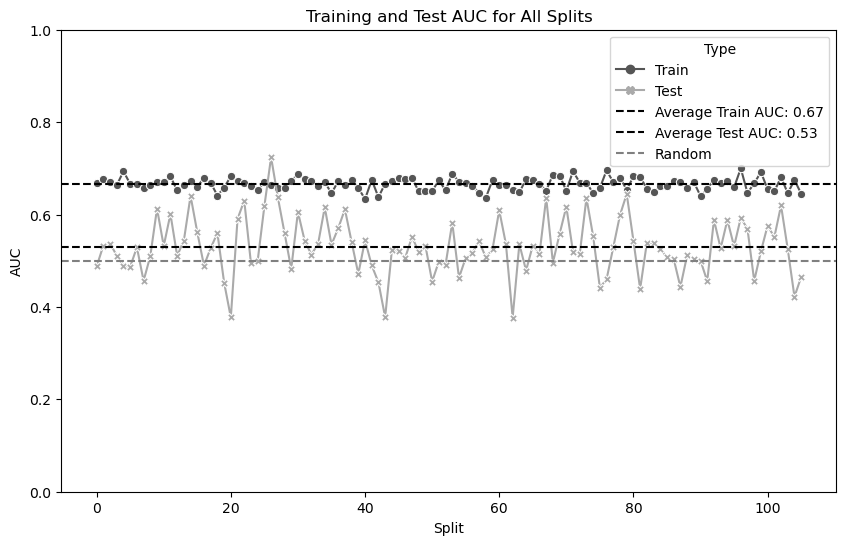

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'train_aucs' and 'test_aucs' are lists of AUC scores
splits = np.arange(len(train_aucs))  # Assuming splits are sequential and equal to the length of AUC lists

# Prepare a DataFrame for Seaborn
data = pd.DataFrame({
    'Split': np.concatenate([splits, splits]),  # Double the splits for train and test
    'AUC': np.concatenate([train_aucs, test_aucs]),  # Combine AUC scores
    'Type': ['Train']*len(train_aucs) + ['Test']*len(test_aucs)  # Label types
})

# Calculate the average values for training and test AUCs
avg_train_auc = sum(train_aucs) / len(train_aucs)
avg_test_auc = sum(test_aucs) / len(test_aucs)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Set the color palette to black and white
palette = sns.color_palette("gray", n_colors=2)

# Draw a line plot with Seaborn
sns.lineplot(data=data, x='Split', y='AUC', hue='Type', style='Type', markers=True, dashes=False, palette=palette)

# Add average lines for Train and Test AUCs
plt.axhline(y=avg_train_auc, color='black', linestyle='--', label=f"Average Train AUC: {avg_train_auc:.2f}")
plt.axhline(y=avg_test_auc, color='black', linestyle='--', label=f"Average Test AUC: {avg_test_auc:.2f}")

# Line for random chance performance
plt.axhline(y=0.5, color='gray', linestyle='--', label="Random")

# Customize the axes and title
plt.xlabel('Split')
plt.ylabel('AUC')
plt.title('Training and Test AUC for All Splits')

# Show the legend and customize it to not show the color guide
plt.legend(title='Type')

# Set the ylim to standardize the AUC view
plt.ylim([0, 1])

# Display the plot
plt.show()


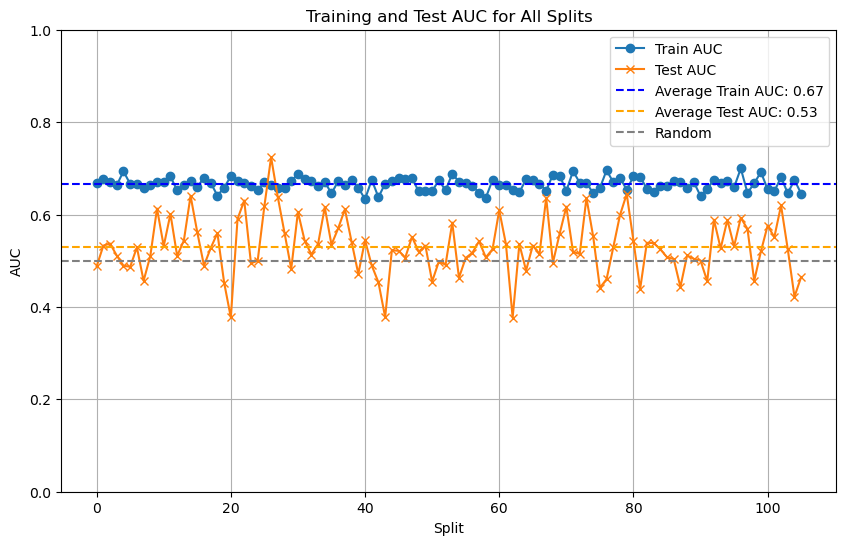

In [16]:
import matplotlib.pyplot as plt

# Calculate the average values for training and test AUCs
avg_train_auc = sum(train_aucs) / len(train_aucs)
avg_test_auc = sum(test_aucs) / len(test_aucs)

plt.figure(figsize=(10, 6))
plt.plot(train_aucs, label="Train AUC", marker='o')
plt.plot(test_aucs, label="Test AUC", marker='x')

# Add average lines for Train and Test AUCs
plt.axhline(y=avg_train_auc, color='blue', linestyle='--', label=f"Average Train AUC: {avg_train_auc:.2f}")
plt.axhline(y=avg_test_auc, color='orange', linestyle='--', label=f"Average Test AUC: {avg_test_auc:.2f}")

# Line for random
plt.axhline(y=0.5, color='gray', linestyle='--', label="Random")

plt.xlabel('Split')
plt.ylabel('AUC')
plt.title('Training and Test AUC for All Splits')
plt.legend()
plt.grid(True)
plt.ylim([0, 1])
plt.show()
